In [3]:
# 17-April-2024
# CSC354 – Assignmen3 – ML – Support Vector Machines
# Abdul Rehman Butt
# FA21-BSE-098
# Fitting a linear SVM using default parameter settings on the dataset and plotting the decision boundary and training data points using a scatter plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

path = "/content/drive/MyDrive/Machine Learning/Assignment 3/"

data = pd.read_csv(path + "dataset-q-1.csv")

X = data.drop(data.columns[2], axis=1)
y = data.iloc[:, 2]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_model = SVC(kernel='linear')
svm_model.fit(X_scaled, y)


SVC(kernel='linear')

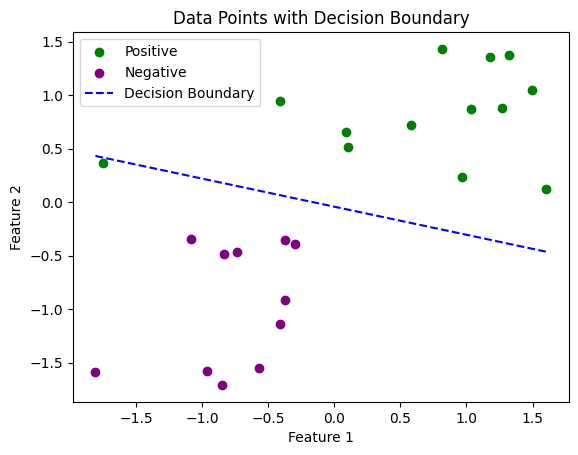

In [8]:
def plot_with_boundary(X, y, model):
    positive_points = X[y == 1]
    negative_points = X[y == -1]

    plt.scatter(positive_points[:, 0], positive_points[:, 1], c='green', label='Positive')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], c='purple', label='Negative')

    coef = model.coef_[0]
    intercept = model.intercept_

    # Plotting the decision boundary line
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = (-coef[0] / coef[1]) * x_values - (intercept / coef[1])
    plt.plot(x_values, y_values, linestyle='--', color='blue', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Data Points with Decision Boundary')
    plt.legend()
    plt.show()

plot_with_boundary(X_scaled, y, svm_model)

1. Do the positive and negative instances group together, suggesting a clear separation between the
classes?
Yes they are suggesting a clear separation between the
classes. It can be seen as well through the scatter plot generated above.
2. Are there any outliers? If yes, can you spot them?
Yes, there is one outlier of the positive class which can be seen very near to the boundary line. But the SVM model is using the soft margin and default value of regularization parameter C to alow this outlier on the other side of the boundary line and is ensuring the maximum distance between the support vectors.It is a generalized model.